<a href="https://colab.research.google.com/github/asadyousuf-dare/Thesis-work/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

sample_data


In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [6]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): 
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  for j in sequence:
    results[i, j] = 1. 
 return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Model building

In [9]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

In [10]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5275 - accuracy: 0.7803 - val_loss: 0.4023 - val_accuracy: 0.8674
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3159 - accuracy: 0.9013 - val_loss: 0.3072 - val_accuracy: 0.8866
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2280 - accuracy: 0.9253 - val_loss: 0.2769 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1760 - accuracy: 0.9430 - val_loss: 0.2886 - val_accuracy: 0.8851
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1426 - accuracy: 0.9541 - val_loss: 0.3005 - val_accuracy: 0.8801
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1172 - accuracy: 0.9615 - val_loss: 0.3102 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0956 - accuracy: 0.9707 - val_loss: 0.3172 - val_accuracy: 0.8833
Epoch 8/20
30

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

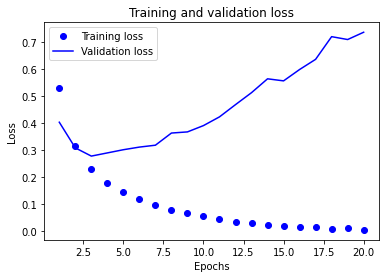

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

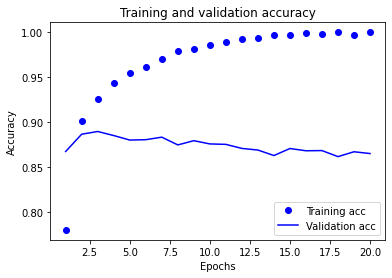

In [16]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4967 - accuracy: 0.8216
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2845 - accuracy: 0.9046
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2117 - accuracy: 0.9259
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2957 - accuracy: 0.8827


In [18]:
results


[0.2956925928592682, 0.8827199935913086]

In [19]:
model.predict(x_test)

array([[0.17629474],
       [0.9990522 ],
       [0.7587211 ],
       ...,
       [0.10159379],
       [0.07434171],
       [0.47249168]], dtype=float32)